### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### importing datset

In [2]:
df=pd.read_csv('train.csv')

### EDA

In [3]:
df.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,5.8,NaN


In [4]:
# dropping unnecessary columns
df.drop(['ID','date','warehouse_ID'],axis=1,inplace=True)

In [5]:
df.head()

,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5
1,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1
2,41.681471,-72.794746,Type_A,2017,January,No,No,4.8,NaN
3,38.749077,-105.183060,Type_A,2017,January,No,No,6.7,NaN
4,41.681471,-72.794746,Type_A,2017,January,No,No,5.8,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16644 entries, 0 to 16643
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               16312 non-null  float64
 1   Longitude              16228 non-null  float64
 2   Product_Type           16644 non-null  object 
 3   year                   16644 non-null  int64  
 4   month                  16644 non-null  object 
 5   is_weekend             16145 non-null  object 
 6   is_warehouse_closed    16478 non-null  object 
 7   daily_dispatch_count   16644 non-null  float64
 8   weekly_dispatch_count  2372 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [7]:
df.shape

(16644, 9)

In [8]:
#Checking dor null values
df.isnull().sum()

Latitude                   332
Longitude                  416
Product_Type                 0
year                         0
month                        0
is_weekend                 499
is_warehouse_closed        166
daily_dispatch_count         0
weekly_dispatch_count    14272
dtype: int64

In [9]:
#Null values imputation
df['Latitude']=df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude']=df['Longitude'].fillna(df['Longitude'].mean())
df['is_weekend']=df['is_weekend'].fillna(df['is_weekend'].mode()[0])
df['is_warehouse_closed']=df['is_warehouse_closed'].fillna(df['is_warehouse_closed'].mode()[0])
df['weekly_dispatch_count']=df['weekly_dispatch_count'].fillna(df['weekly_dispatch_count'].mean())


In [10]:
df.isnull().sum()

Latitude                 0
Longitude                0
Product_Type             0
year                     0
month                    0
is_weekend               0
is_warehouse_closed      0
daily_dispatch_count     0
weekly_dispatch_count    0
dtype: int64

### Visualizations

array([[<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'daily_dispatch_count'}>],
       [<AxesSubplot:title={'center':'weekly_dispatch_count'}>,
        <AxesSubplot:>]], dtype=object)

<Figure size 720x504 with 0 Axes>

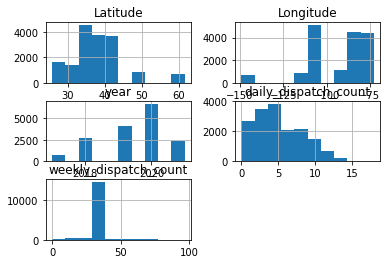

In [11]:
plt.figure(figsize=(10,7))
df.hist()

<AxesSubplot:xlabel='Product_Type', ylabel='count'>

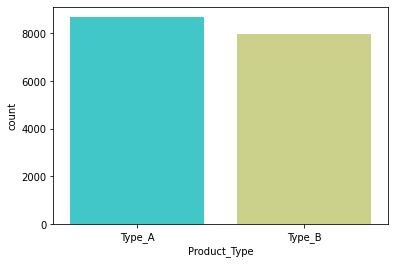

In [12]:
sns.countplot(x='Product_Type',data=df,palette='rainbow')

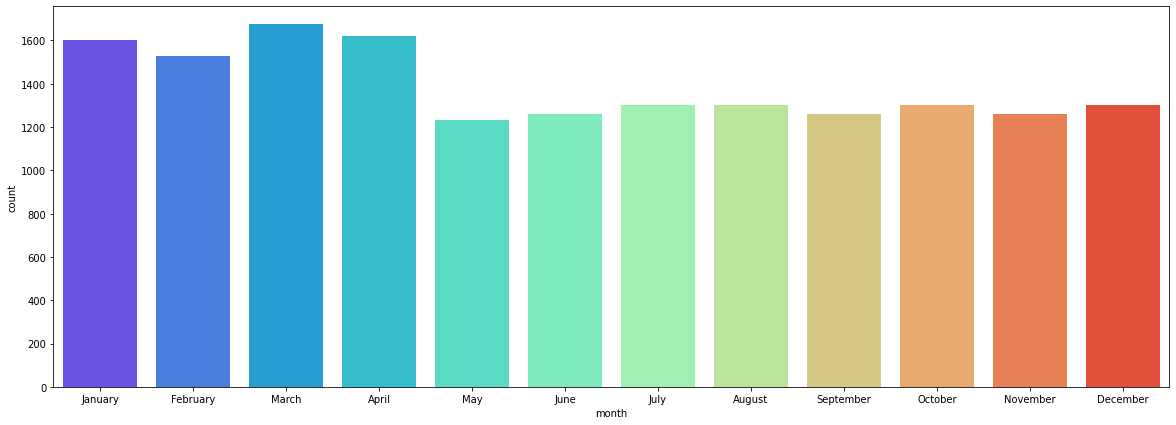

In [13]:
plt.figure(figsize=(20,7))
sns.countplot(x='month',data=df,palette='rainbow')
plt.show()

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

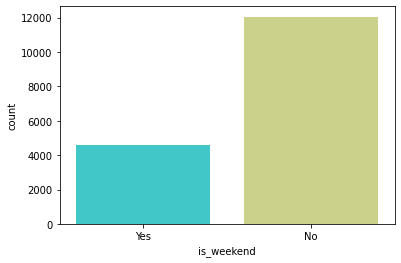

In [14]:
sns.countplot(x='is_weekend',data=df,palette='rainbow')

<AxesSubplot:xlabel='is_warehouse_closed', ylabel='count'>

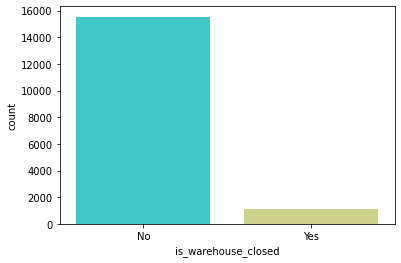

In [15]:
sns.countplot(x='is_warehouse_closed',data=df,palette='rainbow')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16644 entries, 0 to 16643
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               16644 non-null  float64
 1   Longitude              16644 non-null  float64
 2   Product_Type           16644 non-null  object 
 3   year                   16644 non-null  int64  
 4   month                  16644 non-null  object 
 5   is_weekend             16644 non-null  object 
 6   is_warehouse_closed    16644 non-null  object 
 7   daily_dispatch_count   16644 non-null  float64
 8   weekly_dispatch_count  16644 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


### Feature engineering

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Product_Type']=le.fit_transform(df['Product_Type'])
df['month']=le.fit_transform(df['month'])
df['is_weekend']=le.fit_transform(df['is_weekend'])
df['is_warehouse_closed']=le.fit_transform(df['is_warehouse_closed'])



In [18]:
df.head()

,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,41.681471,-72.794746,0,2017,4,1,0,5.5,5.500000
1,38.749077,-105.183060,0,2017,4,1,0,6.1,6.100000
2,41.681471,-72.794746,0,2017,4,0,0,4.8,35.233938
3,38.749077,-105.183060,0,2017,4,0,0,6.7,35.233938
4,41.681471,-72.794746,0,2017,4,0,0,5.8,35.233938


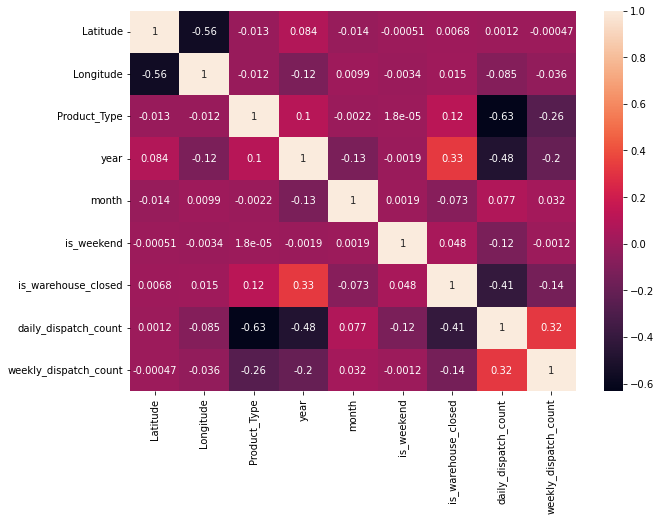

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='rocket')
plt.show()


### Separating dependant and independant variable

In [20]:
X=df.drop(['daily_dispatch_count'],axis=1)
y=df.daily_dispatch_count

In [21]:
X

,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,weekly_dispatch_count
0,41.681471,-72.794746,0,2017,4,1,0,5.500000
1,38.749077,-105.183060,0,2017,4,1,0,6.100000
2,41.681471,-72.794746,0,2017,4,0,0,35.233938
3,38.749077,-105.183060,0,2017,4,0,0,35.233938
4,41.681471,-72.794746,0,2017,4,0,0,35.233938
...,...,...,...,...,...,...,...,...
16639,37.915825,-89.829262,1,2021,0,0,0,35.233938
16640,48.692551,-116.319862,0,2021,0,0,0,35.233938
16641,48.692551,-116.319862,1,2021,0,0,0,35.233938
16642,61.600803,-149.125259,0,2021,0,0,0,35.233938


In [22]:
y

0         5.5
1         6.1
2         4.8
3         6.7
4         5.8
         ... 
16639     0.2
16640    12.3
16641     3.3
16642     7.1
16643     3.4
Name: daily_dispatch_count, Length: 16644, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting xgboost regressor due to high accuracy

In [25]:
from xgboost import XGBRegressor
xr=XGBRegressor()
xr.fit(X_train,y_train)
y_hat=xr.predict(X_test)
from sklearn.metrics import mean_squared_error
print("Mean squared error:",mean_squared_error(y_test,y_hat))

Mean squared error: 1.8185975363652749


In [26]:
print("Training accuracy:",xr.score(X_train,y_train))

Training accuracy: 0.8683525707493926


In [27]:
print("Testing accuracy:",xr.score(X_test,y_test))

Testing accuracy: 0.831939989869902
